In [132]:
import re
import jieba
from wordcloud import WordCloud
from PIL import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.sans-serif"] = ["Microsoft YaHei"]

In [4]:
tempfile = pd.read_csv("sinaContent.csv")

In [5]:
tempfile

,名字,url,内容0,时间0,转发0,评论0,点赞0,内容1,时间1,转发1,...,内容8,时间8,转发8,评论8,点赞8,内容9,时间9,转发9,评论9,点赞9
0,腾讯视频,https://weibo.com/ilovevideo,浙江卫视跨年阵容官宣 阵容海报第三波 @陈立农 @范丞丞Adam0616 @孟美岐 @鞠婧祎...,2020-12-28 19:16,65007.0,3272.0,254278.0,浙江卫视跨年 宣传片首发 星光熠熠 值得期待 2020年12月31日19 30 @腾讯视频 ...,2020-12-28 19:33,3950.0,...,浙江卫视跨年阵容官宣 阵容海报第一波 跑男家族来啦 2020年12月31日19 30 @腾讯...,2020-12-28 16:14,448.0,502.0,25222.0,令人心动的offer超话BB机 IC卡 魂斗罗 贪吃蛇 冷门知识点一秒就能get到 现场起哄...,2020-12-28 17:45,172.0,230.0,14818.0
1,腾讯体育,https://weibo.com/tengxuntiyu,哈登虽然备受争议 但今对阵开拓者的比赛 火箭少了7名球员 大胡子全场疯狂砍下44分17助攻 ...,2020-12-27 19:46,77.0,217.0,11666.0,据腾讯体育记者独家了解 瑞士联邦最高法院已经撤销了国际体育仲裁法院今年2月针对孙杨的禁赛8年...,2020-12-24 07:14,236.0,...,独家揭秘 孙杨禁赛8年裁决为何被撤销 孙杨聘用王牌律师团队 前后两次提出上诉 听证会程序涉嫌...,2020-12-24 07:16,34.0,50.0,305.0,据名记Shams报道 火箭球员沃尔 考辛斯 戈登等将面临7天隔离 由于一名隔离中的火箭成员的...,2020-12-25 11:21,123.0,17.0,62.0
2,腾讯微信团队,https://weibo.com/weixinteam,微信表情更新了 微信上线裂开表情 打开下面6张灵魂小表情 猜猜分别代表什么意思 标准答案就在...,2020-11-18 18:17,8015.0,57757.0,312805.0,哇哥 举起你的右手 就能马上拥有,2020-11-19 07:57,189.0,...,微信上线青少年模式 iOS 用户更新到 7 0 17 最新版本 前往 我 设置 可开启 功能...,2020-12-18 19:33,35.0,267.0,171.0,微信支持个人定制红包封面 牌面拉满 从今天开始 满足条件的个人创作者也能定制红包封面啦 定制...,NaN,10.0,366.0,76.0
3,腾讯视频VIP,https://weibo.com/hollywoodtheatre,浙江卫视跨年 宣传片首发 星光熠熠 值得期待 2020年12月31日19 30 @腾讯视频 ...,2020-12-28 19:41,492.0,672.0,58924.0,北京卫视跨年 北京跨年阵容 热血燃冰 为冬奥助力 和@Mr_凡先生 一起关注北京2022年冬...,2020-12-28 10:41,3797.0,...,北京卫视跨年 北京跨年阵容 圆梦冰雪 为冬奥助力 和@UNIQ 王一博 一起关注北京2022...,2020-12-28 10:39,1222.0,631.0,4452.0,加载矢志奋斗的动力 闪耀无限幸福的光芒 距离 江苏卫视跨年 播出还有3天 2020年12月3...,2020-12-28 09:58,145.0,202.0,5641.0
4,腾讯综艺,https://weibo.com/remendezongyi,浙江卫视跨年 宣传片首发 星光熠熠 值得期待 O2020年12月31日19 30 @腾讯视频...,2020-12-28 19:36,616.0,939.0,68964.0,江苏卫视跨年全阵容 亚洲顶秀 点亮鲸喜时刻 群星聚力 闪耀跨年之夜 江苏卫视跨年 蓄势待发 ...,2020-12-28 09:53,780.0,...,浙江卫视跨年阵容官宣 阵容海报第二波 @关晓彤 @张若昀 @王凯kkw @宋轶xiaoyiy...,2020-12-28 17:01,133.0,357.0,11562.0,北京卫视跨年 北京跨年阵容 冰雪狂欢 为冬奥助力 和@李现ing 一起关注北京2022年冬奥...,2020-12-28 10:47,2133.0,1601.0,8308.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,腾讯新闻我的时代和我,https://weibo.com/u/6505340726,我的时代和我 公司最忙碌的时间里 蒋友柏和同事居然直接在办公室操练了起来 扫码解锁蒋友柏的高效秘籍,2018-08-19 16:01,2.0,10.0,34.0,我的人生過程中 選擇了靠意志力克服一切 被告誡過意志力策略缺乏經濟性 代價太大 但這就是我 ...,2018-08-14 21:38,507.0,...,@蒋友柏 忆儿时初遇大陆人备受冲击 只差没拿枪互指 蒋友柏在接受@陈晓楠 采访时回忆11岁时...,NaN,4.0,2.0,15.0,蒋家第四代 蒋友柏 一个姓氏 两个故乡 家族的烙印 让@蒋友柏 年少时便饱尝人情冷暖 他曾有...,NaN,0.0,0.0,29.0
167,饭局的诱惑,https://weibo.com/u/5934477397,置顶 饭局的诱惑 收官放大招 五个 爱的故事 离奇荒诞 @胡彦斌 第一次见她父母 我是一个人...,2017-09-27 20:00,924.0,873.0,248.0,阿娇注册结婚 恭喜,2018-12-18 15:00,3.0,...,新年快乐 新的一年我们都是饭局上的小霸王 饭局的诱惑,NaN,1.0,1.0,8.0,你是谁不重要 重要的是你变成谁 来@饭局狼人杀 为你的身份好好说话,2018-07-11 11:43,7.0,22.0,23.0
168,极品飞车OL官博,https://weibo.com/u/5896258942,置顶 Born to Race 延续了OneRepublic一贯的正能量曲风 以 竞速 为主...,2018-05-05 12:31,19.0,106.0,56.0,共和时代OneRepublic新歌 Born To Race 生而竞速 MV中国首发上线 M...,NaN,2.0,...,极品飞车OL两周年快到啦 周年狂欢预先集结 回归享福利 邀请领好礼 含丰厚SP 年代车礼包 ...,2019-11-26 19:13,1.0,3.0,7.0,最撩人的餐厅 @食物语手游 今天发车啦 带你寻味千古美食之旅 下载链接 O网页链接,NaN,1.0,4.0,8.0
169,腾讯漫动画,https://weibo.com/u/6863132053,化龙记广播剧超话 化龙记广播剧 师尊的叫醒服务 专业 靠谱,2020-09-30 16:34,0.0,0.0,0.0,化龙记广播剧超话 化龙记超话 @腾讯动漫 出品 @霸总光线君 @吉戾 原作 @猫耳方糖工作室...,NaN,0.0,...,配了个百花妹妹 嫁了,NaN,0.0,0.0,3.0,化龙记广播剧超话 化龙记超话 敖融 好花堪折直须折 莫待无花空折枝 穷天 大胆淫贼 竟敢夜闯...,赞,0.0,0.0,1.0


In [23]:
data = []
for index,row in tempfile.iterrows():
    for i in range(10):
        time = row["时间"+str(i)]
        if pd.isnull(time): continue
        if not time[-5:-3]: continue
        time = int(time[-5:-3])
        reweibo = row["转发"+str(i)]
        comment = row["评论"+str(i)]
        thumb = row["点赞"+str(i)]
        if reweibo <1 or comment < 1 or thumb < 1: continue
        data.append([time,reweibo,comment,thumb])
data = pd.DataFrame(data,columns = ["时间","转发","评论","点赞"])

In [24]:
data

,时间,转发,评论,点赞
0,19,65007.0,3272.0,254278.0
1,19,3950.0,2069.0,286257.0
2,12,1829.0,1079.0,68349.0
3,21,2292.0,1612.0,53330.0
4,12,1058.0,568.0,35983.0
...,...,...,...,...
883,11,7.0,22.0,23.0
884,12,19.0,106.0,56.0
885,0,1.0,2.0,9.0
886,10,1.0,2.0,8.0


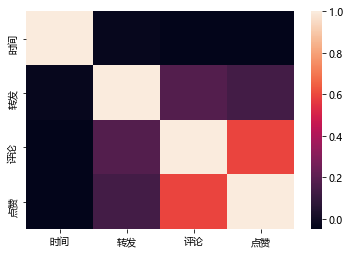

In [25]:
sns.heatmap(data.corr())

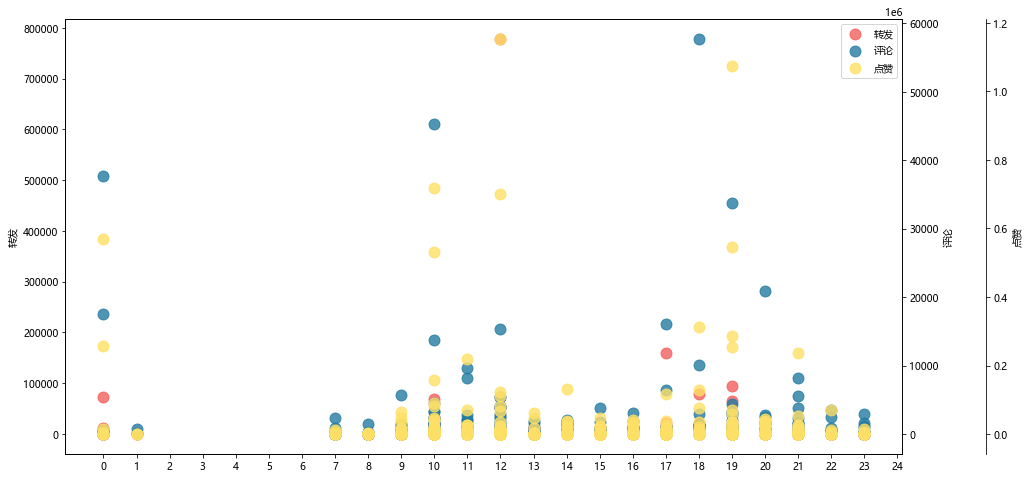

In [35]:
fig,axes = plt.subplots(1,1,figsize=(15,8))
axes_reweibo = axes
axes_comment = axes.twinx()
axes_thumb = axes.twinx()
axes_thumb.spines["right"].set_position(("axes",1.1))

L1 = axes_reweibo.scatter(data["时间"].to_numpy(), data["转发"].to_numpy(),label = "转发",color="#F25F5C",alpha = 0.8,s=120)
L2 = axes_comment.scatter(data["时间"].to_numpy(), data["评论"].to_numpy(),label = "评论",color="#247BA0",alpha = 0.8,s=120)
L3 = axes_thumb.scatter(data["时间"].to_numpy(), data["点赞"].to_numpy(),label = "点赞",color="#FFE066",alpha = 0.8,s=120)
axes_reweibo.set_ylabel("转发")
axes_comment.set_ylabel("评论")
axes_thumb.set_ylabel("点赞")
plt.xticks(np.arange(0,25,1.0))
plt.xlabel("时间")
plt.legend([L1,L2,L3],[l.get_label()for l in [L1,L2,L3]],loc="best")
plt.show()

# 词频分析

In [44]:
def word_cleaning(content):
    content = re.sub(r"@[\u4e00-\u9fff0-9a-zA-Z_]*\s", "", content)
    content = re.sub(r"[^\u4e00-\u9fff]", "", content)
    
    return content

In [45]:
t = word_cleaning(tempfile["内容0"][10])

In [46]:
t

'首掌来了拜托了冰箱第六季第七期第八期小白和井宝的有趣故事快来复习看来很多人没看过那期节目你们宣传差点意思啊'

In [51]:
stopwords = [line.strip() for line in open("stopwords-zh.txt", encoding="UTF-8").readlines()]

In [69]:
" ".join(list(filter(lambda x : x not in stopwords, jieba.lcut(t))))

'首掌 拜托 冰箱 第六 季 第七期 第八期 小白 井宝 有趣 故事 快 复习 看来 很多 没 看过 期 节目 宣传 差点 意思'

In [75]:
mask = imageio.imread("nz1.jpg")

In [76]:
wc = WordCloud(font_path=r"C:\Windows\Fonts\msyh.ttc", mask=mask).generate(" ".join(list(filter(lambda x : x not in stopwords, jieba.lcut(t)))))

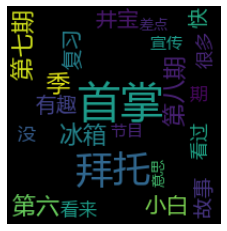

In [77]:
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [168]:
def make_wordCloud(tempfile):
    stopwords = [line.strip() for line in open("stopwords-zh.txt", encoding="UTF-8").readlines()]
    new = ""
    for index,row in tempfile.iterrows():
        for i in range(10):
            content = row["内容"+str(i)]
            if pd.isnull(content): continue
            new += word_cleaning(content)
    new = " ".join(list(filter(lambda x : x not in stopwords, jieba.lcut(new))))
    w_frequency = {}
    for word in new.split(" "):
        if word in w_frequency.keys():
            w_frequency[word]+=1
        else:
            w_frequency[word]= 1
    mask = Image.open("qq2.png")
    mask = ~np.array(mask)
    wc = WordCloud(
        font_path=r"C:\Windows\Fonts\msyh.ttc",
        mask=mask,
        background_color = "white",
        max_font_size=80,
        max_words=2000
    ).generate_from_frequencies(w_frequency)
    return wc,w_frequency

In [169]:
wc , w_frequency = make_wordCloud(tempfile)

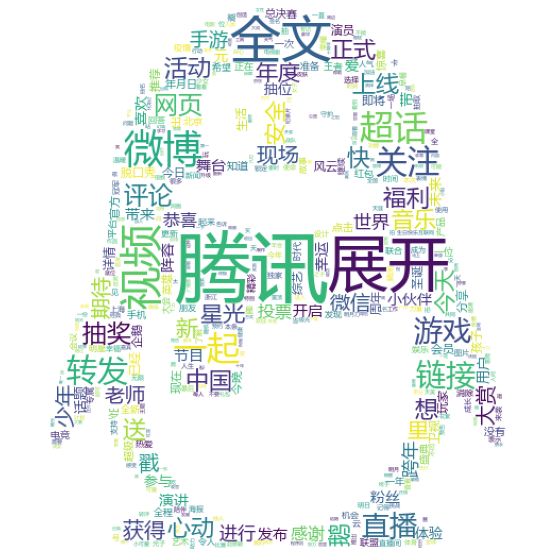

In [172]:
plt.figure(figsize=(10,10))
plt.imshow(wc)
plt.axis("off")
plt.show()

In [129]:
w_frequency

{'浙江': 29,
 '卫视': 51,
 '跨年': 63,
 '阵容': 60,
 '官宣': 22,
 '海报': 33,
 '第三': 6,
 '波来': 9,
 '年月日': 45,
 '全程': 40,
 '直播': 146,
 '小鹅': 16,
 '陪': 26,
 '团圆': 10,
 '宣传片': 6,
 '首发': 24,
 '星光': 89,
 '熠熠': 6,
 '值得': 14,
 '期待': 74,
 '张艺兴': 5,
 '蔡': 4,
 '徐坤': 4,
 '全': 31,
 '众星': 2,
 '云集': 2,
 '咖齐': 2,
 '聚': 3,
 '舞台': 56,
 '东方': 17,
 '梦圆': 4,
 '同心': 4,
 '跨越': 8,
 '第一': 20,
 '弹来': 7,
 '哈哈哈': 5,
 '最新': 20,
 '预告': 27,
 '电': 11,
 '竞比': 1,
 '完': 9,
 '结束': 19,
 '可能': 24,
 '忠橙杯': 1,
 '篮球赛': 1,
 '马上': 21,
 '担任': 7,
 '教练': 2,
 '布置': 1,
 '战术': 1,
 '团队': 17,
 '默契': 4,
 '配合': 4,
 '迅速': 7,
 '拿分': 1,
 '王晨艺': 1,
 '加速': 17,
 '奔跑': 2,
 '不慎': 1,
 '摔倒': 1,
 '周震南': 11,
 '最后': 29,
 '球': 5,
 '终结': 1,
 '比赛': 25,
 '周五': 10,
 '抢先': 14,
 '看晚': 1,
 '转免': 1,
 '鹅': 103,
 '正片': 17,
 '里': 75,
 '告诉': 25,
 '展开': 523,
 '全文': 513,
 '第五': 14,
 '第二': 13,
 '第一波': 2,
 '跑': 22,
 '男': 10,
 '家族': 11,
 '令人': 36,
 '心动': 99,
 '超': 19,
 '话机': 2,
 '卡': 33,
 '魂斗罗': 5,
 '贪吃蛇': 2,
 '冷门': 2,
 '知识点': 5,
 '一秒': 6,
 '现场': 76,
 '起哄': 5,
 '梗': 6,
 '瞬间': 31

In [177]:
import operator
#sorted_d = sorted(w_frequency.items(), key=operator.itemgetter(1))
sorted_d = dict( sorted(w_frequency.items(), key=operator.itemgetter(1),reverse=True))

In [178]:
sorted_d

{'腾讯': 582,
 '展开': 523,
 '全文': 513,
 '视频': 343,
 '微博': 294,
 '超话': 221,
 '一起': 203,
 '关注': 188,
 '转发': 176,
 '链接': 167,
 '游戏': 159,
 '直播': 146,
 '评论': 112,
 '抽奖': 111,
 '网页': 111,
 '上线': 106,
 '活动': 106,
 '福利': 106,
 '鹅': 103,
 '中国': 102,
 '心动': 99,
 '想': 99,
 '快': 96,
 '送': 96,
 '音乐': 91,
 '正式': 90,
 '星光': 89,
 '新': 88,
 '年度': 86,
 '安全': 86,
 '今天': 85,
 '获得': 78,
 '现场': 76,
 '少年': 76,
 '里': 75,
 '期待': 74,
 '老师': 70,
 '微信': 69,
 '戳': 68,
 '大赏': 68,
 '手游': 67,
 '进行': 65,
 '世界': 64,
 '跨年': 63,
 '投票': 62,
 '恭喜': 62,
 '感谢': 61,
 '小伙伴': 61,
 '演讲': 61,
 '阵容': 60,
 '开启': 60,
 '带': 60,
 '粉丝': 59,
 '带来': 59,
 '节目': 59,
 '发布': 58,
 '幸运': 57,
 '舞台': 56,
 '喜欢': 56,
 '未来': 56,
 '体验': 56,
 '参与': 56,
 '话题': 56,
 '用户': 55,
 '爱': 55,
 '元': 55,
 '抽位': 55,
 '风云': 55,
 '已经': 54,
 '即将': 54,
 '今日': 54,
 '会员': 54,
 '脱口秀': 54,
 '岁': 53,
 '生活': 53,
 '演员': 52,
 '卫视': 51,
 '详情': 51,
 '分享': 51,
 '企鹅': 51,
 '综艺': 49,
 '今晚': 49,
 '官方': 49,
 '现在': 49,
 '出': 49,
 '圣诞': 46,
 '周年': 46,
 '孩子': 46,
 '玩家': 46,
 '推荐': 46,
